Question -3
How does the price changes for neighbourhood throughout the year?
1. Plotting line graph to see the variation (Use average price of the same day to calculate the data)


In [163]:
# Imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import folium
import json
import re
from collections import Counter
from scipy import stats
import geopandas as gpd

In [164]:
# All Arnesh imports for extension 
listings_filepath = '/Users/arneshsaha/Desktop/AirBnb/datasets/listings.csv'
listings_df = pd.read_csv(listings_filepath)

calendar_filepath = '/Users/arneshsaha/Desktop/AirBnb/datasets/calendar.csv'
calendar_df = pd.read_csv(calendar_filepath)

neighbourhoods_filepath = '/Users/arneshsaha/Desktop/AirBnb/datasets/neighbourhoods.csv'
neighbourhoods_df = pd.read_csv(neighbourhoods_filepath)

In [165]:
listings_for_calendar = listings_df.loc[:, ['id', 'neighbourhood_cleansed', 'latitude', 'longitude']]

In [166]:
calendar_df['listing_id'].nunique()

7389

In [167]:
# calendar_df = calendar_df['price'].dropna()
# calendar_df['price'] = calendar_df['price'].str.replace('$', '')  # Remove dollar sign
# calendar_df['price'] = calendar_df['price'].str.replace(',', '')  # Remove comma separators (if present)
# calendar_df['price'] = calendar_df['price'].astype(float).astype(int)  # Convert to float and then to int

calendar_df['price'] = calendar_df['price'].str.replace(',', '',regex=True).str.replace('$', '',regex=True).astype('float')


# calendar_df['date'] = pd.to_datetime(calendar_df['date'])
# # Group the data by date and calculate the mean price for each date
# avg_price_by_date = calendar_df.groupby('date')['price'].mean()

In [168]:
# Q1 = calendar_df['price'].quantile(0.25)
# Q3 = calendar_df['price'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outlier detection
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR

# # Identify and remove outliers
# calendar_df = calendar_df[(calendar_df['price'] >= lower_bound) & (calendar_df['price'] <= upper_bound)]

In [169]:
pivot_df = calendar_df.pivot(index='listing_id', columns='date', values='price')
pivot_df.to_csv('/Users/arneshsaha/Desktop/AirBnb/datasets/pivot_df.csv')
pivot_df['2022-12-18']


listing_id
15420                 115.0
24288                  73.0
38628                  55.0
44009                  45.0
44552                  44.0
                      ...  
782136800346144859    350.0
782448596836883109    100.0
782474793883477230     35.0
782510024659134909     80.0
782521844972923104     95.0
Name: 2022-12-18, Length: 7389, dtype: float64

In [170]:
# merge the two dataframes on the id and listing_id columns
merged_df = pd.merge(pivot_df, listings_for_calendar, left_on='listing_id', right_on='id')
merged_df
# check if the id and listing_id columns match
# match = all(merged_df['id'] == merged_df['listing_id'])

# print(match)

,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,...,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,id,neighbourhood_cleansed,latitude,longitude
0,100.0,115.0,115.0,115.0,115.0,120.0,120.0,120.0,130.0,130.0,...,120.0,120.0,120.0,120.0,120.0,NaN,15420,"Old Town, Princes Street and Leith Street",55.957590,-3.188050
1,NaN,79.0,73.0,65.0,65.0,65.0,65.0,67.0,65.0,65.0,...,93.0,93.0,93.0,94.0,94.0,94.0,24288,"Canongate, Southside and Dumbiedykes",55.943830,-3.184450
2,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,NaN,38628,Joppa,55.942150,-3.096400
3,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.0,45.0,45.0,NaN,44009,Marchmont West,55.938000,-3.194680
4,NaN,42.0,44.0,44.0,44.0,44.0,44.0,42.0,42.0,56.0,...,39.0,39.0,39.0,39.0,42.0,42.0,44552,South Leith,55.966120,-3.171840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7384,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,295.0,350.0,...,350.0,350.0,350.0,350.0,350.0,NaN,782136800346144859,New Town East and Gayfield,55.958031,-3.184608
7385,NaN,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,782448596836883109,Leith (Albert Street),55.963253,-3.172172
7386,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,...,35.0,35.0,35.0,35.0,35.0,NaN,782474793883477230,The Inch,55.917450,-3.162740
7387,75.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,100.0,100.0,...,75.0,75.0,75.0,75.0,75.0,NaN,782510024659134909,Bonnington,55.974178,-3.181042


In [171]:

#Load the dataset
# quality_df = pd.read_csv('quality_data.csv')

# #Calculate the IQR
# Q1 = quality_df['price'].quantile(0.25)
# Q3 = quality_df['price'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outlier detection
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR

# # Identify and remove outliers
# quality_df = quality_df[(quality_df['price'] >= lower_bound) & (quality_df['price'] <= upper_bound)]

In [172]:
# pivot_df = pivot_df[~(pivot_df > 300).any(axis=1)]
# pivot_df

# merged_df = merged_df[~(merged_df > 300).any(axis=1)]
# merged_df

# int_cols = merged_df.select_dtypes(exclude=['int', 'float']).columns.tolist()
# print(int_cols)

# # drop the rows where any column has a value greater than 200, except for the non-int columns
# merged_df = merged_df[merged_df[int_cols].apply(lambda x: ~(x > 200).any(), axis=1)]

# specify the columns to exclude
cols_to_exclude = ['id', 'neighbourhood_cleansed', 'latitude', 'longitude']

# select all columns except the excluded ones
non_excluded_cols = [col for col in merged_df.columns if col not in cols_to_exclude]

# drop the rows where any column except the excluded ones has a value greater than 200
merged_df = merged_df[merged_df[non_excluded_cols].apply(lambda x: ~(x > 200).any(), axis=1)]
merged_df

,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,...,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,id,neighbourhood_cleansed,latitude,longitude
0,100.0,115.0,115.0,115.0,115.0,120.0,120.0,120.0,130.0,130.0,...,120.0,120.0,120.0,120.0,120.0,NaN,15420,"Old Town, Princes Street and Leith Street",55.957590,-3.188050
1,NaN,79.0,73.0,65.0,65.0,65.0,65.0,67.0,65.0,65.0,...,93.0,93.0,93.0,94.0,94.0,94.0,24288,"Canongate, Southside and Dumbiedykes",55.943830,-3.184450
2,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,NaN,38628,Joppa,55.942150,-3.096400
3,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.0,45.0,45.0,NaN,44009,Marchmont West,55.938000,-3.194680
4,NaN,42.0,44.0,44.0,44.0,44.0,44.0,42.0,42.0,56.0,...,39.0,39.0,39.0,39.0,42.0,42.0,44552,South Leith,55.966120,-3.171840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7383,NaN,99.0,93.0,93.0,93.0,93.0,93.0,99.0,99.0,93.0,...,93.0,93.0,93.0,93.0,99.0,99.0,781855194633396192,Pilrig,55.966882,-3.175113
7385,NaN,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,782448596836883109,Leith (Albert Street),55.963253,-3.172172
7386,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,...,35.0,35.0,35.0,35.0,35.0,NaN,782474793883477230,The Inch,55.917450,-3.162740
7387,75.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,100.0,100.0,...,75.0,75.0,75.0,75.0,75.0,NaN,782510024659134909,Bonnington,55.974178,-3.181042


In [173]:
# merged_df = merged_df[(merged_df > 300).any(axis=1)]
# merged_df
print(merged_df.columns)

Index(['2022-12-16', '2022-12-17', '2022-12-18', '2022-12-19', '2022-12-20',
       '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
       ...
       '2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-15',
       '2023-12-16', 'id', 'neighbourhood_cleansed', 'latitude', 'longitude'],
      dtype='object', length=370)


In [174]:
for cols in merged_df.columns:
    print(merged_df[cols].isna().count())

4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059
4059


In [175]:
# pivot_df.dropna(inplace=True)
merged_df = merged_df.fillna(merged_df.mean()) 
merged_df

/var/folders/rv/l0bvb2qx7kj9z133h3zxt1040000gn/T/ipykernel_57758/1173050788.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df = merged_df.fillna(merged_df.mean())


,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,...,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,id,neighbourhood_cleansed,latitude,longitude
0,100.000000,115.0,115.0,115.0,115.0,120.0,120.0,120.0,130.0,130.0,...,120.0,120.0,120.0,120.0,120.0,99.68705,15420,"Old Town, Princes Street and Leith Street",55.957590,-3.188050
1,89.403917,79.0,73.0,65.0,65.0,65.0,65.0,67.0,65.0,65.0,...,93.0,93.0,93.0,94.0,94.0,94.00000,24288,"Canongate, Southside and Dumbiedykes",55.943830,-3.184450
2,55.000000,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,99.68705,38628,Joppa,55.942150,-3.096400
3,45.000000,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.0,45.0,45.0,99.68705,44009,Marchmont West,55.938000,-3.194680
4,89.403917,42.0,44.0,44.0,44.0,44.0,44.0,42.0,42.0,56.0,...,39.0,39.0,39.0,39.0,42.0,42.00000,44552,South Leith,55.966120,-3.171840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7383,89.403917,99.0,93.0,93.0,93.0,93.0,93.0,99.0,99.0,93.0,...,93.0,93.0,93.0,93.0,99.0,99.00000,781855194633396192,Pilrig,55.966882,-3.175113
7385,89.403917,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.00000,782448596836883109,Leith (Albert Street),55.963253,-3.172172
7386,35.000000,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,...,35.0,35.0,35.0,35.0,35.0,99.68705,782474793883477230,The Inch,55.917450,-3.162740
7387,75.000000,80.0,80.0,80.0,80.0,80.0,80.0,80.0,100.0,100.0,...,75.0,75.0,75.0,75.0,75.0,99.68705,782510024659134909,Bonnington,55.974178,-3.181042


In [176]:
# Q1 = calendar_df['price'].quantile(0.25)
# Q3 = calendar_df['price'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outlier detection
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR

# filtered_df = pivot_df[~((pivot_df < (Q1 - 1.5 * IQR)) | (pivot_df > (Q3 + 1.5 * IQR))).any(axis=1)]
# filtered_df

In [177]:
grouped_df = merged_df.groupby('neighbourhood_cleansed').mean().reset_index().rename(columns={'neighbourhood_cleansed': 'neighbourhood'})
grouped_df

,neighbourhood,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,...,2023-12-10,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,id,latitude,longitude
0,Abbeyhill,83.318777,84.728814,80.457627,81.033898,80.932203,80.491525,80.745763,84.152542,86.406780,...,87.525424,87.186441,87.169492,87.169492,87.237288,89.542373,99.273930,2.595244e+17,55.955405,-3.167248
1,Baberton and Juniper Green,80.142857,80.142857,77.142857,77.142857,77.142857,77.142857,77.142857,80.142857,80.142857,...,81.571429,81.571429,81.571429,81.571429,81.571429,81.571429,99.687050,3.635418e+17,55.907795,-3.285446
2,Balerno and Bonnington Village,79.571429,79.571429,78.857143,78.857143,78.857143,78.857143,73.142857,73.857143,73.857143,...,84.142857,84.142857,84.142857,84.142857,84.142857,84.857143,99.687050,2.653759e+07,55.876611,-3.353850
3,Balgreen and Roseburn,111.680131,117.966667,115.033333,114.366667,114.366667,114.366667,115.233333,118.866667,118.733333,...,123.166667,122.966667,122.966667,122.966667,122.966667,123.633333,102.864149,2.393760e+17,55.942864,-3.248113
4,"Barnton, Cammo and Cramond South",127.500000,138.750000,138.750000,138.750000,138.750000,138.750000,138.750000,138.750000,140.000000,...,151.000000,151.250000,151.250000,151.250000,151.250000,151.000000,99.687050,3.250945e+17,55.963433,-3.306517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Trinity,80.242424,80.393939,77.606061,77.303030,77.303030,76.909091,76.909091,78.939394,79.272727,...,78.515152,78.424242,78.424242,78.424242,78.424242,81.303030,99.687050,1.913119e+17,55.975047,-3.210082
106,Trinity East and The Dudleys,108.173913,108.869565,102.304348,100.521739,99.782609,100.391304,101.739130,108.086957,108.086957,...,104.739130,104.608696,104.608696,104.608696,104.565217,112.347826,99.687050,2.372368e+17,55.975124,-3.194771
107,West Pilton,55.958333,56.583333,52.166667,51.333333,51.750000,51.458333,51.791667,56.416667,57.666667,...,59.500000,59.041667,59.166667,59.166667,59.250000,62.416667,99.687050,2.134741e+17,55.971147,-3.241764
108,Western Harbour and Leith Docks,92.822032,93.127273,91.290909,91.054545,91.272727,92.272727,93.254545,97.490909,97.981818,...,95.545455,95.254545,95.254545,95.272727,95.254545,97.563636,99.740484,2.254962e+17,55.979890,-3.179094


In [178]:
# In grouped_df, the id column is not needed. The latitude and longitude columns in listings.df gives us the information about the location of each property in the neighbourhood.
# Thus I think we should drop the latitude and longitude columns from grouped_df. 
# Instead, we should have the geometry column from neighbourhoods.csv (It alrteady contains information about the latitiude and longitude of each property)
grouped_df.drop(columns=['id', 'latitude', 'longitude'], inplace=True)
grouped_df

,neighbourhood,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,...,2023-12-07,2023-12-08,2023-12-09,2023-12-10,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16
0,Abbeyhill,83.318777,84.728814,80.457627,81.033898,80.932203,80.491525,80.745763,84.152542,86.406780,...,87.237288,89.542373,89.610169,87.525424,87.186441,87.169492,87.169492,87.237288,89.542373,99.273930
1,Baberton and Juniper Green,80.142857,80.142857,77.142857,77.142857,77.142857,77.142857,77.142857,80.142857,80.142857,...,81.571429,81.571429,81.571429,81.571429,81.571429,81.571429,81.571429,81.571429,81.571429,99.687050
2,Balerno and Bonnington Village,79.571429,79.571429,78.857143,78.857143,78.857143,78.857143,73.142857,73.857143,73.857143,...,84.142857,84.857143,84.857143,84.142857,84.142857,84.142857,84.142857,84.142857,84.857143,99.687050
3,Balgreen and Roseburn,111.680131,117.966667,115.033333,114.366667,114.366667,114.366667,115.233333,118.866667,118.733333,...,122.966667,123.633333,123.666667,123.166667,122.966667,122.966667,122.966667,122.966667,123.633333,102.864149
4,"Barnton, Cammo and Cramond South",127.500000,138.750000,138.750000,138.750000,138.750000,138.750000,138.750000,138.750000,140.000000,...,151.250000,151.000000,151.000000,151.000000,151.250000,151.250000,151.250000,151.250000,151.000000,99.687050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Trinity,80.242424,80.393939,77.606061,77.303030,77.303030,76.909091,76.909091,78.939394,79.272727,...,78.424242,81.303030,81.303030,78.515152,78.424242,78.424242,78.424242,78.424242,81.303030,99.687050
106,Trinity East and The Dudleys,108.173913,108.869565,102.304348,100.521739,99.782609,100.391304,101.739130,108.086957,108.086957,...,104.565217,112.347826,112.391304,104.739130,104.608696,104.608696,104.608696,104.565217,112.347826,99.687050
107,West Pilton,55.958333,56.583333,52.166667,51.333333,51.750000,51.458333,51.791667,56.416667,57.666667,...,59.083333,62.250000,62.333333,59.500000,59.041667,59.166667,59.166667,59.250000,62.416667,99.687050
108,Western Harbour and Leith Docks,92.822032,93.127273,91.290909,91.054545,91.272727,92.272727,93.254545,97.490909,97.981818,...,95.254545,97.563636,97.636364,95.545455,95.254545,95.254545,95.272727,95.254545,97.563636,99.740484


In [179]:
neighbourhoods_df.drop(columns=['neighbourhood_group'], inplace=True)
# Convert the geometry column to a GeoSeries object
geometry2 = gpd.GeoSeries.from_wkt(neighbourhoods_df['geometry'])
# Create a geopandas dataframe with the geometry column
neighbourhoods_gdf = gpd.GeoDataFrame(neighbourhoods_df, geometry=geometry2)
type(neighbourhoods_gdf.geometry)

geopandas.geoseries.GeoSeries

In [180]:
# grouped_df_nbd: neighbourhoods_gdf['geometry'] merged with grouped_df
grouped_df_nbd = neighbourhoods_gdf.merge(grouped_df, on='neighbourhood')
grouped_df_nbd.drop(grouped_df_nbd.columns[0], axis=1, inplace=True)
print(type(grouped_df_nbd.geometry))
grouped_df_nbd


<class 'geopandas.geoseries.GeoSeries'>


,neighbourhood,geometry,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,...,2023-12-07,2023-12-08,2023-12-09,2023-12-10,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16
0,Balerno and Bonnington Village,"MULTIPOLYGON (((-3.35805 55.91088, -3.35950 55...",79.571429,79.571429,78.857143,78.857143,78.857143,78.857143,73.142857,73.857143,...,84.142857,84.857143,84.857143,84.142857,84.142857,84.142857,84.142857,84.142857,84.857143,99.68705
1,Currie West,"MULTIPOLYGON (((-3.30557 55.92039, -3.30418 55...",56.750000,57.000000,57.125000,58.375000,58.625000,59.125000,59.125000,61.000000,...,60.750000,60.875000,60.875000,60.875000,60.750000,60.750000,60.750000,60.750000,60.875000,99.68705
2,Currie East,"MULTIPOLYGON (((-3.30808 55.89430, -3.30870 55...",66.500000,66.500000,64.500000,67.000000,67.000000,67.000000,67.000000,62.000000,...,66.666667,68.333333,68.333333,66.666667,66.666667,66.666667,66.666667,66.666667,68.333333,99.68705
3,Baberton and Juniper Green,"MULTIPOLYGON (((-3.28635 55.91564, -3.28617 55...",80.142857,80.142857,77.142857,77.142857,77.142857,77.142857,77.142857,80.142857,...,81.571429,81.571429,81.571429,81.571429,81.571429,81.571429,81.571429,81.571429,81.571429,99.68705
4,Bonaly and The Pentlands,"MULTIPOLYGON (((-3.30808 55.89430, -3.30834 55...",82.466667,82.466667,83.200000,80.866667,81.400000,81.400000,81.400000,82.000000,...,84.066667,83.800000,83.933333,84.400000,84.066667,84.066667,84.066667,84.066667,83.800000,99.68705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,South Gyle,"MULTIPOLYGON (((-3.30084 55.94246, -3.30081 55...",79.416667,80.666667,79.000000,76.916667,79.000000,79.000000,79.833333,82.750000,...,82.916667,85.666667,85.666667,83.083333,82.916667,82.916667,82.916667,82.916667,85.666667,99.68705
106,"Ratho, Ingliston and Gogar","MULTIPOLYGON (((-3.34287 55.96432, -3.34150 55...",105.333333,106.000000,101.148148,100.777778,101.370370,101.555556,101.370370,105.851852,...,101.370370,106.481481,106.518519,101.481481,101.370370,101.370370,101.370370,101.370370,106.481481,99.68705
107,Queensferry West,"MULTIPOLYGON (((-3.41600 55.99385, -3.41582 55...",55.833333,55.833333,53.666667,53.666667,53.666667,53.666667,53.666667,59.666667,...,50.333333,53.500000,53.500000,50.833333,50.333333,50.333333,50.333333,50.333333,53.500000,99.68705
108,"Dalmeny, Kirkliston and Newbridge","MULTIPOLYGON (((-3.29012 55.99545, -3.28998 55...",74.692308,74.153846,73.769231,74.461538,74.307692,76.000000,75.076923,75.461538,...,74.076923,74.615385,74.692308,74.307692,74.076923,74.076923,74.076923,74.076923,74.615385,99.68705


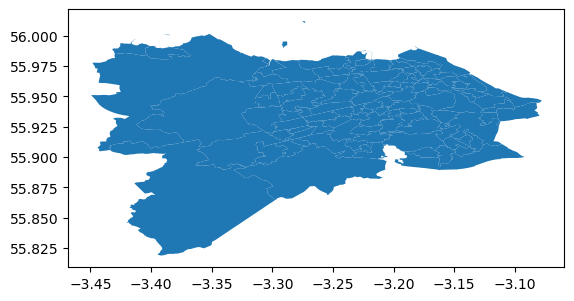

In [181]:
grouped_df_nbd.plot()
grouped_df_nbd.to_csv('/Users/arneshsaha/Desktop/AirBnb/datasets/grouped_df_nbd.csv')

Working on price fluctuation based on neighbourhood

In [182]:
# Trying to do a standard deviation column for each neighbourhood's mean price fluctuation
price_cols = [col for col in grouped_df_nbd.columns if col.startswith('20')]
# Calculate the standard deviation of the mean price across all dates for each neighbourhood
grouped_df_nbd['price_std'] = grouped_df_nbd[price_cols].std(axis=1)
# Sort the neighbourhoods by price fluctuation over the year
grouped_df_nbd.sort_values(by='price_std', ascending=False)

,neighbourhood,geometry,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,...,2023-12-08,2023-12-09,2023-12-10,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,price_std
97,"Barnton, Cammo and Cramond South","MULTIPOLYGON (((-3.30916 55.96957, -3.30915 55...",127.500000,138.750000,138.750000,138.750000,138.750000,138.750000,138.750000,138.750000,...,151.000000,151.000000,151.000000,151.250000,151.250000,151.250000,151.250000,151.000000,99.68705,10.535435
20,Moredun and Craigour,"MULTIPOLYGON (((-3.13933 55.91860, -3.13862 55...",70.555556,70.555556,70.555556,68.333333,68.333333,69.111111,69.111111,62.222222,...,75.555556,75.666667,75.000000,76.000000,76.000000,76.000000,76.000000,76.111111,99.68705,8.774304
19,Greenbank and The Braids,"MULTIPOLYGON (((-3.21008 55.91993, -3.21025 55...",87.166667,87.166667,85.833333,85.833333,85.833333,85.833333,85.833333,87.166667,...,74.500000,74.500000,73.166667,73.166667,73.166667,73.166667,73.166667,74.500000,99.68705,6.811714
87,Blackhall,"MULTIPOLYGON (((-3.26070 55.96441, -3.24975 55...",79.466667,81.800000,73.200000,70.533333,70.533333,70.533333,71.466667,79.133333,...,74.533333,74.533333,68.200000,68.200000,68.200000,68.200000,68.200000,74.533333,99.68705,6.466026
99,East Craigs North,"MULTIPOLYGON (((-3.30048 55.95916, -3.29900 55...",88.666667,88.500000,81.833333,81.000000,80.666667,81.833333,88.500000,90.500000,...,87.166667,87.333333,81.000000,80.500000,80.500000,80.333333,80.500000,87.166667,99.68705,6.178897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,Willowbrae and Duddingston Village,"MULTIPOLYGON (((-3.14938 55.95536, -3.14916 55...",76.045455,76.045455,75.818182,75.681818,76.045455,76.772727,77.909091,79.681818,...,78.863636,78.863636,77.500000,77.272727,77.272727,77.272727,77.318182,78.863636,99.68705,1.883426
60,Restalrig (Loganlea) and Craigentinny West,"MULTIPOLYGON (((-3.14581 55.96305, -3.14562 55...",78.548387,79.290323,78.064516,78.548387,79.161290,79.161290,78.935484,83.935484,...,80.870968,80.903226,80.419355,80.354839,80.354839,80.354839,80.387097,80.870968,99.68705,1.866162
91,Granton South and Wardieburn,"MULTIPOLYGON (((-3.22401 55.98043, -3.22225 55...",67.000000,67.000000,67.000000,67.000000,67.000000,69.500000,69.500000,69.500000,...,69.500000,69.750000,69.750000,69.500000,69.500000,69.500000,69.500000,69.500000,99.68705,1.607251
26,Mortonhall and Anwickhill,"MULTIPOLYGON (((-3.17067 55.90843, -3.17037 55...",80.000000,80.000000,78.333333,78.333333,78.333333,78.333333,78.333333,80.000000,...,80.000000,80.000000,78.333333,78.333333,78.333333,78.333333,78.333333,80.000000,99.68705,1.326554


<Axes: >

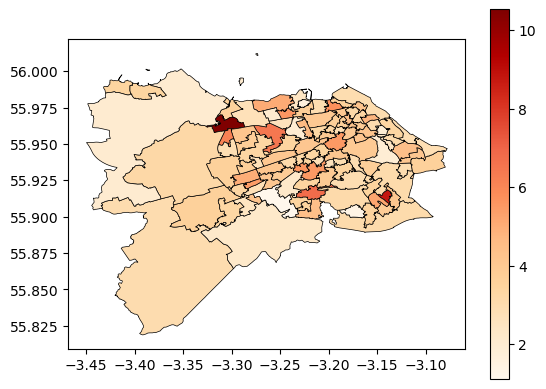

In [183]:
grouped_df_nbd.plot(column='price_std', legend=True, cmap='OrRd', edgecolor='black', linewidth=0.5, aspect = 1.5)

Price fluctuations as observed: Sorted Descending<b>
<li> We will be observing the price fluctuation based on the neighbourhoods.
    <ol>Moredun and Craigour </ol>
    <ol>Greenbank and The Braids </ol>
    <ol>Parkhead and Sighthill</ol>
</li>
<li>
<ul>East Craigs North -- darker shade of orange -- Neighbourhood adjacent to the Edinburgh Airport. -- Is the price fluctuation normal? -- Do tourists choose to select places near the airport for the travel? -- Around which season do we notice the price fluctuations</ul>
<ul></ul>
<ul>Old Town Princes Street Orange fluctuation? why? no. of properties more in that region? thus even tho demand is high, the number of properties helps that.</ul>
<ul>Dalmeny, Kirkliston and Newbridge -- Lower Orange fluctation -- Is it because it is far away from the centre? Even if there's low fluctuation, are there outliers?</ul>
<ul>Least Price fluctuation: Mortonhall and Anwickhill</ul>
<ul>Granton West and Salvesen - Does having a property near the ocean help? -- is the price fluctuation primarily during the tourist season?  </ul>
<ul>Analyse the neighbourhoods for the 3 universities in Edinburgh. And see durign which season we observe the maximum price fluctuation ? Is it the tourise season or around September when the new session for uni is starting?</ul>
</li>

In [184]:
# Creating a new dataframe containing the neighbourhoods sorted in descending order based on the price fluctation or standard deviation
# I have also reset the index of the dataframe, but if you don't want to reset the index, you can remove the reset_index() method
grouped_df_nbd_sorted = grouped_df_nbd.sort_values(by='price_std', ascending=False).reset_index(drop=True)

In [185]:
# Extract month and year from column names
date_columns = [col for col in grouped_df_nbd_sorted.columns if col not in ['neighbourhood', 'geometry', 'price_std']]
# The dates are in the format 'YYYY-MM-DD'. We want to extract the month and year from the date
month = [col[5:7] for col in date_columns]

In [186]:
# Create a list of unique neighborhoods
unique_neighborhoods = grouped_df_nbd_sorted['neighbourhood'].unique()

# Create an empty DataFrame with neighborhoods as index and months as columns
grouped_nbd_monthly_price = pd.DataFrame(index=unique_neighborhoods, columns=[str(m) for m in range(1, 13)])

# Initialize a dictionary to store the prices for December 2022 and December 2023 separately
december_prices = {n: {'sum': 0, 'count': 0} for n in unique_neighborhoods}

# Iterate over the neighborhoods
for _, row in grouped_df_nbd_sorted.iterrows():
    neighborhood = row['neighbourhood']

    # Initialize variables for monthly calculations
    current_month = int(month[0])
    current_sum = row[date_columns[0]]
    current_count = 1

    # Iterate over the month list and calculate the mean monthly price
    for i, m in enumerate(month[1:], start=1):
        m = int(m)  # Convert month to integer
        if m == current_month:
            current_sum += row[date_columns[i]]
            current_count += 1
        else:
            if current_month == 12:
                # Save the prices for December separately
                december_prices[neighborhood]['sum'] += current_sum
                december_prices[neighborhood]['count'] += current_count
            else:
                mean_monthly_price_value = current_sum / current_count
                grouped_nbd_monthly_price.at[neighborhood, str(current_month)] = mean_monthly_price_value

            current_month = m
            current_sum = row[date_columns[i]]
            current_count = 1

    if current_month == 12:
        # Save the prices for December separately
        december_prices[neighborhood]['sum'] += current_sum
        december_prices[neighborhood]['count'] += current_count
    else:
        mean_monthly_price_value = current_sum / current_count
        grouped_nbd_monthly_price.at[neighborhood, str(current_month)] = mean_monthly_price_value

# Calculate the combined mean monthly price for December
for neighborhood in unique_neighborhoods:
    grouped_nbd_monthly_price.at[neighborhood, '12'] = december_prices[neighborhood]['sum'] / december_prices[neighborhood]['count']

# If you want to convert it back to a GeoDataFrame
grouped_nbd_monthly_price.reset_index(inplace=True)
grouped_nbd_monthly_price.rename(columns={'index': 'neighbourhood'}, inplace=True)
grouped_nbd_monthly_price = gpd.GeoDataFrame(grouped_nbd_monthly_price)


In [187]:
grouped_nbd_monthly_price = neighbourhoods_gdf.merge(grouped_nbd_monthly_price, on='neighbourhood')
# Trying to do a standard deviation column for each neighbourhood's mean price fluctuation
price_cols = ['1', '2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12']
# Calculate the standard deviation of the mean price across all dates for each neighbourhood
grouped_nbd_monthly_price['price_std'] = grouped_nbd_monthly_price[price_cols].std(axis=1)


In [188]:
grouped_nbd_monthly_price.sort_values(by='price_std', ascending=False)

,Unnamed: 0,neighbourhood,geometry,1,2,3,4,5,6,7,8,9,10,11,12,price_std
97,98,"Barnton, Cammo and Cramond South","MULTIPOLYGON (((-3.30916 55.96957, -3.30915 55...",131.935484,131.25,125.0,130.258333,134.370968,145.55,151.137097,151.153226,151.133333,151.145161,151.15,143.294908,10.138109
20,20,Moredun and Craigour,"MULTIPOLYGON (((-3.13933 55.91860, -3.13862 55...",60.874552,60.25,60.250896,65.859259,69.562724,73.877778,82.878136,84.695341,80.292593,76.222222,75.096296,73.212443,8.655737
19,19,Greenbank and The Braids,"MULTIPOLYGON (((-3.21008 55.91993, -3.21025 55...",73.973118,70.261905,76.112903,73.344444,75.016129,79.427778,84.026882,91.0,83.722222,76.155914,79.3,82.037095,5.767285
10,10,Parkhead and Sighthill,"MULTIPOLYGON (((-3.27006 55.92530, -3.26999 55...",61.168459,60.936508,60.939068,60.944444,60.921147,59.562963,60.734767,69.544803,70.207407,70.154122,70.162963,73.684665,5.264365
87,88,Blackhall,"MULTIPOLYGON (((-3.26070 55.96441, -3.24975 55...",70.333333,68.37619,69.234409,70.851111,71.636559,72.313333,72.176344,87.735484,71.2,70.329032,69.842222,75.963137,5.165871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Drylaw,"MULTIPOLYGON (((-3.23642 55.96744, -3.23666 55...",60.722581,60.545238,60.643011,60.891111,61.445161,61.968889,61.903226,61.793548,62.042222,61.795699,61.822222,63.84647,0.900306
94,95,Muirhouse,"MULTIPOLYGON (((-3.25355 55.97440, -3.25312 55...",62.702509,62.313492,62.734767,62.874074,63.261649,63.366667,63.40681,63.146953,63.153704,63.150538,63.148148,64.998901,0.651911
6,6,Colinton and Kingsknowe,"MULTIPOLYGON (((-3.25012 55.92184, -3.24984 55...",83.993088,83.571429,83.509217,83.811905,84.050691,84.288095,84.28341,84.776498,84.328571,84.246544,84.252381,84.735756,0.395212
26,27,Mortonhall and Anwickhill,"MULTIPOLYGON (((-3.17067 55.90843, -3.17037 55...",78.763441,78.809524,78.817204,78.833333,78.763441,78.833333,78.817204,78.763441,78.888889,78.763441,78.777778,79.573554,0.225849


<Axes: >

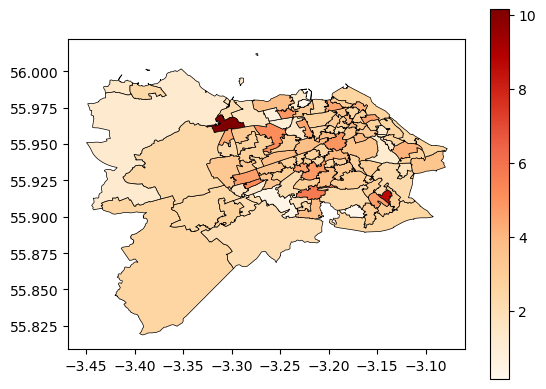

In [189]:
grouped_nbd_monthly_price.plot(column='price_std', legend=True, cmap='OrRd', edgecolor='black', linewidth=0.5, aspect = 1.5)